In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import keras
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from keras.layers import InputLayer, Dense, Input
from keras.models import Model
from keras.optimizers import SGD

In [21]:
X, y = make_classification(n_samples=1000,n_features=5,random_state=True)

In [46]:
df = pd.DataFrame(X)
df

,0,1,2,3,4
0,-1.390876,0.624780,3.480910,2.382337,0.386224
1,-0.485295,0.300515,1.339153,0.846201,1.177454
2,-0.735047,0.134123,1.543506,1.223439,-0.628799
3,0.659448,1.477480,1.028153,-0.807709,-0.343500
4,0.172882,0.992719,1.183751,-0.101911,0.089118
...,...,...,...,...,...
995,-2.893223,-2.428824,1.610309,4.279125,-1.301066
996,-1.755670,-0.657155,2.210512,2.744847,0.546998
997,-0.823580,-1.672778,-1.023650,1.040028,-0.118542
998,0.987894,2.101046,1.370633,-1.230374,-0.563622


In [47]:
df['class'] = y

In [48]:
df

,0,1,2,3,4,class
0,-1.390876,0.624780,3.480910,2.382337,0.386224,1
1,-0.485295,0.300515,1.339153,0.846201,1.177454,1
2,-0.735047,0.134123,1.543506,1.223439,-0.628799,1
3,0.659448,1.477480,1.028153,-0.807709,-0.343500,1
4,0.172882,0.992719,1.183751,-0.101911,0.089118,0
...,...,...,...,...,...,...
995,-2.893223,-2.428824,1.610309,4.279125,-1.301066,1
996,-1.755670,-0.657155,2.210512,2.744847,0.546998,1
997,-0.823580,-1.672778,-1.023650,1.040028,-0.118542,0
998,0.987894,2.101046,1.370633,-1.230374,-0.563622,1


In [49]:
X = df.drop('class', axis=1)
y = df['class']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=23)

**Flow of Our Architecture**

In [51]:
il = Input(shape=(5,))

hl_1 = Dense(units=4, activation='tanh')(il)
hl_2 = Dense(units=3, activation='tanh')(hl_1)
ol = Dense(units=1, activation='sigmoid')(hl_2)

**Model**

In [52]:
model = Model(inputs=il,outputs=ol)

model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43 (172.00 B)

 Trainable params: 43 (172.00 B)

 Non-trainable params: 0 (0.00 B)

**Compiling**

In [53]:
sgd = SGD(learning_rate=0.001)

In [54]:
model.compile(optimizer='sgd', loss = 'binary_crossentropy',metrics=['accuracy'])

**Training**

In [55]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.2)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5303 - loss: 0.7042 - val_accuracy: 0.6313 - val_loss: 0.6656
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6939 - loss: 0.6350 - val_accuracy: 0.6938 - val_loss: 0.6228
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7433 - loss: 0.5985 - val_accuracy: 0.7250 - val_loss: 0.5876
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7946 - loss: 0.5504 - val_accuracy: 0.7625 - val_loss: 0.5560
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8001 - loss: 0.5341 - val_accuracy: 0.8000 - val_loss: 0.5289
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8381 - loss: 0.5046 - val_accuracy: 0.8062 - val_loss: 0.5049
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8536 - loss: 0.4644 - val_accuracy: 0.8188 - val_loss: 0.4841
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8701 - loss: 0.4369 - val_accuracy: 0.8250 - val_loss:

In [56]:
history.history

{'accuracy': [0.598437488079071,
  0.7124999761581421,
  0.7734375,
  0.800000011920929,
  0.8203125,
  0.8374999761581421,
  0.8421875238418579,
  0.8500000238418579,
  0.854687511920929,
  0.8531249761581421],
 'loss': [0.6805397868156433,
  0.6249659657478333,
  0.5834628343582153,
  0.5493876338005066,
  0.5205878019332886,
  0.4961329400539398,
  0.47527456283569336,
  0.4577200412750244,
  0.4426664710044861,
  0.4301423132419586],
 'val_accuracy': [0.6312500238418579,
  0.6937500238418579,
  0.7250000238418579,
  0.762499988079071,
  0.800000011920929,
  0.8062499761581421,
  0.8187500238418579,
  0.824999988079071,
  0.8374999761581421,
  0.856249988079071],
 'val_loss': [0.6655572056770325,
  0.6227600574493408,
  0.5875857472419739,
  0.5560463666915894,
  0.5288776755332947,
  0.5049005746841431,
  0.4841058850288391,
  0.46676889061927795,
  0.45256996154785156,
  0.4397326111793518]}

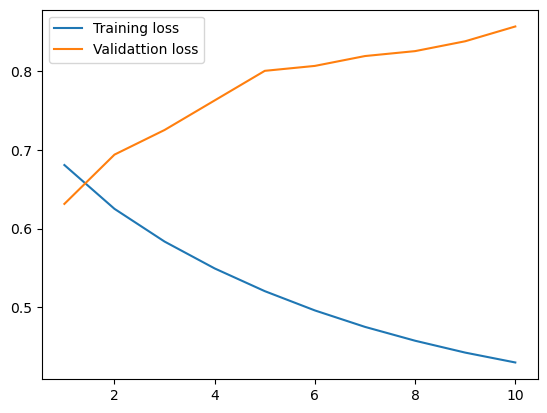

In [57]:
plt.plot(range(1,11), history.history['loss'], label = 'Training loss')
plt.plot(range(1,11), history.history['val_accuracy'], label = 'Validattion loss')
plt.legend()

**plot_decision_regions**

In [34]:
!pip install mlxtend


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
import mlxtend

from mlxtend.plotting import plot_decision_regions

ValueError: Filler values must be provided when X has more than 2 training features.

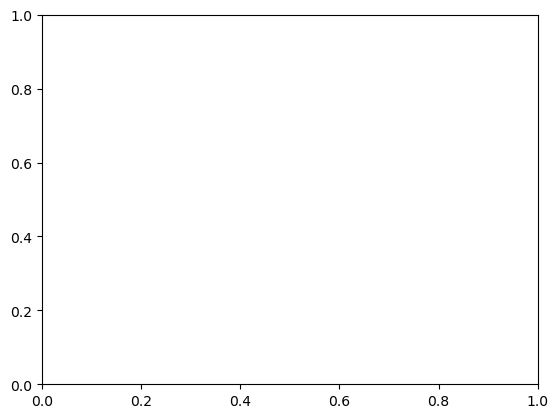

In [73]:
plot_decision_regions(df.iloc[:,:-1].values,df.iloc[:,-1].values,clf=model)

In [77]:
X_plot = df.iloc[:,:-1].values

# Define filler values for the remaining features
filler_values = {2: np.mean(df.iloc[:,-1].values)}

# Plot decision regions
plot_decision_regions(X_plot, y, clf=model, filler_feature_values=filler_values)
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('Decision Regions')
plt.show()

ValueError: y must be a NumPy array. Found <class 'pandas.core.series.Series'>

In [75]:
import numpy as np

In [80]:
X_plot = df.iloc[:, :2].values

# Define filler values for the remaining features
filler_values = {2: np.mean(df.iloc[:, 2].values)}

# Convert y to a NumPy array
y_numpy = y.astype(int)  # Ensure y is integer type

# Plot decision regions
plot_decision_regions(X_plot, y_numpy, clf=model, filler_feature_values=filler_values)
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('Decision Regions')
plt.show()

ValueError: y must be a NumPy array. Found <class 'pandas.core.series.Series'>

In [96]:
model.layers[1].input

<KerasTensor shape=(None, 5), dtype=float32, sparse=None, name=keras_tensor_14>

In [98]:
model2 = Model(inputs = model.layers[1].input, outputs=model.layers[1].output)

In [99]:
model2.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │              24 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24 (96.00 B)

 Trainable params: 24 (96.00 B)

 Non-trainable params: 0 (0.00 B)